# Petroleum Gas Price Analysis using Python: A Case Study of the United States and Europe from 1994 to 2025 

**Michael Cox | Texas A&M University | March 8, 2022 | Modified as of December 27, 2024**

---

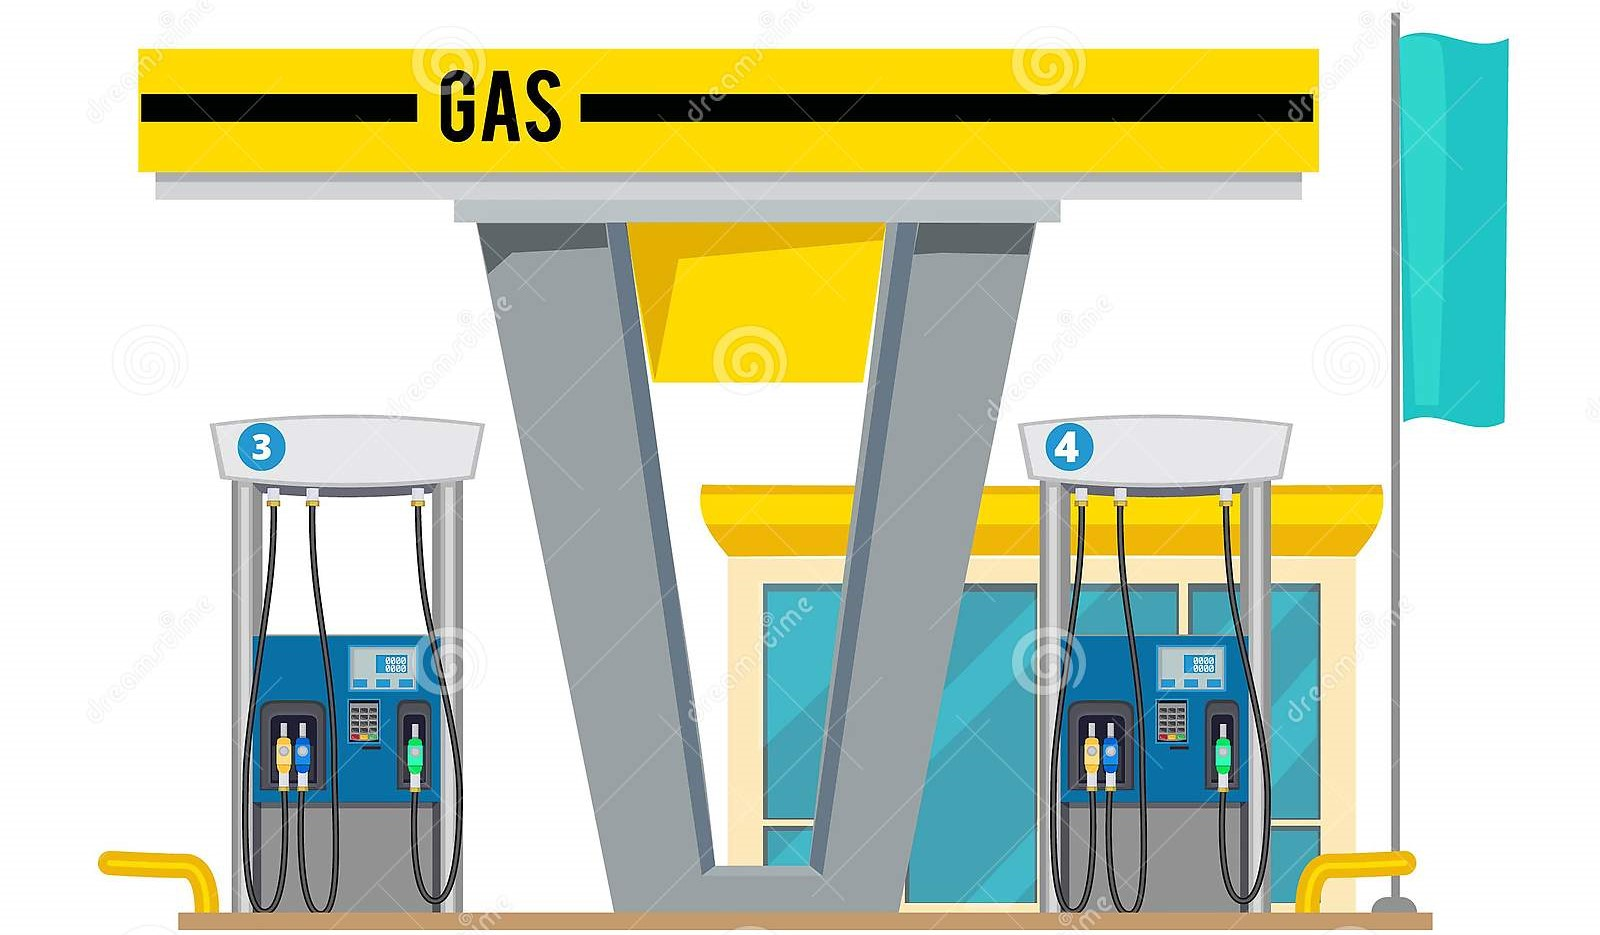

Stock image (https://www.dreamstime.com/illustration/cartoon-gas-pump.html)

## Abstract

This project is an analysis of gas prices in the United States and Europe. The data was collected from the U.S. Energy Information Administration (EIA) and the European Commission. The data was then cleaned and analyzed to show the average gas prices in the U.S. and Europe. The data was then visualized using matplotlib and seaborn to show the trends in gas prices over time. The data was also analyzed to show the correlation between gas prices in the U.S. and Europe. The results show that gas prices in the U.S. and Europe are correlated, but the correlation is not perfect. The data also shows that gas prices in the U.S. and Europe have been increasing over time. This project is a good example of how data analysis can be used to understand trends in gas prices and how they are related to each other. Future reproduction of this project can be done by updating the data and re-running the analysis to see how gas prices have changed over time, specifically with global events such as the Russia-Ukraine conflict and the COVID-19 pandemic.

## Data Sources

**1. Energy Information Administration** (https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=pet&s=emm_epm0_pte_nus_dpg&f=m)

**2. European Environment Agency** (https://www.eea.europa.eu/data-and-maps/daviz/nominal-and-real-fuel-prices-6/#tab-chart_1)

## Load Dependencies 

In [218]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
#import matplotlib.dates
%matplotlib inline
import pandas as pd
import seaborn as sns  # for better style in plots
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore') # clean up the warnings 
#import cartopy  
#import cartopy.crs as ccrs  
#import cartopy.feature as cfeature
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

## Load Data and Create a Pandas Dataframe

Next, I'll create a pandas dataframe `df` from my first dataset, gas_prices_regions.csv, and examine/clean all necessary data.


In [264]:
# create a pandas dataframe from csv
df = pd.read_csv('..\\data\\gas_prices_regions.csv', parse_dates=[0], skiprows=[0, 1], na_values='NaN', index_col=[0])

# NEW DATA UP TO 2025
dfNEW = pd.read_csv('..\\data\\new-us-gas-prices.csv', parse_dates=[0], skiprows=[0, 1], na_values='NaN', index_col=[0])

#df.index, df.shape, df.head()  # check for datetime object, number of rows/cols, and first 5 rows of each column
dfNEW.index, dfNEW.shape, dfNEW.head(), dfNEW.tail()  # check updated data


(DatetimeIndex(['1994-11-28', '1994-12-05', '1994-12-12', '1994-12-19',
                '1994-12-26', '1995-01-02', '1995-01-09', '1995-01-16',
                '1995-01-23', '1995-01-30',
                ...
                '2024-10-28', '2024-11-04', '2024-11-11', '2024-11-18',
                '2024-11-25', '2024-12-02', '2024-12-09', '2024-12-16',
                '2024-12-23',        'NaT'],
               dtype='datetime64[ns]', name='Date', length=1571, freq=None),
 (1571, 22),
             Weekly U.S. All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)  \
 Date                                                                                           
 1994-11-28                                              1.259                                  
 1994-12-05                                              1.254                                  
 1994-12-12                                              1.231                                  
 1994-12-19                 

In [265]:
# iinspect the column attributes
#df.columns
dfNEW.columns

Index(['Weekly U.S. All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)',
       'Weekly East Coast All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)',
       'Weekly New England (PADD 1A) All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)',
       'Weekly Central Atlantic (PADD 1B) All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)',
       'Weekly Lower Atlantic (PADD 1C) All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)',
       'Weekly Midwest All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)',
       'Weekly Gulf Coast All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)',
       'Weekly Rocky Mountain Allgrades Reformulated Retail Gasoline Prices  (Dollars per Gallon)',
       'Weekly West Coast All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)',
       'Weekly California All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallo

## Rename the Column Headers

The column headers are not feasible for me, so I'll go ahead and rename them.

In [221]:
# rename columns 
df.rename(columns={'Weekly U.S. All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)': 'US_Overall', 'Weekly East Coast All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)': 'East_Coast', 'Weekly New England (PADD 1A) All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)':'New_England', 'Weekly Central Atlantic (PADD 1B) All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)': 'Central_Atlantic', 'Weekly Lower Atlantic (PADD 1C) All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)': 'Lower_Atlantic', 'Weekly Midwest All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)':'Midwest', 'Weekly Gulf Coast All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)': 'Gulf_Coast', 'Weekly West Coast All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)':'West_Coast', 'Weekly California All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)':'California', 'Weekly Massachusetts All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)': 'Massachusetts', 'Weekly Texas All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)':'Texas', 'Weekly New York All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)':'New_York', 'Weekly Boston, MA All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)':'Boston', 'Weekly Chicago, IL All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)':'Chicago', 'Weekly Houston, TX All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)': 'Houston', 'Weekly Los Angeles, CA All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)':'Los_Angeles', 'Weekly New York Harbor All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)':'New_York_Harbor', 'Weekly San Francisco, CA All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)':'San_Fran'}, inplace=True)
df.columns

# new dataset
dfNEW.rename(columns={'Weekly U.S. All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)': 'US_Overall', 'Weekly East Coast All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)': 'East_Coast', 'Weekly New England (PADD 1A) All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)':'New_England', 'Weekly Central Atlantic (PADD 1B) All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)': 'Central_Atlantic', 'Weekly Lower Atlantic (PADD 1C) All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)': 'Lower_Atlantic', 'Weekly Midwest All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)':'Midwest', 'Weekly Gulf Coast All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)': 'Gulf_Coast', 'Weekly West Coast All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)':'West_Coast', 'Weekly California All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)':'California', 'Weekly Massachusetts All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)': 'Massachusetts', 'Weekly Texas All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)':'Texas', 'Weekly New York All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)':'New_York', 'Weekly Boston, MA All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)':'Boston', 'Weekly Chicago, IL All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)':'Chicago', 'Weekly Houston, TX All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)': 'Houston', 'Weekly Los Angeles, CA All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)':'Los_Angeles', 'Weekly New York Harbor All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)':'New_York_Harbor', 'Weekly San Francisco, CA All Grades Reformulated Retail Gasoline Prices  (Dollars per Gallon)':'San_Fran'}, inplace=True)
dfNEW.columns

Index(['US_Overall', 'East_Coast', 'New_England', 'Central_Atlantic',
       'Lower_Atlantic', 'Midwest', 'Gulf_Coast',
       'Weekly Rocky Mountain Allgrades Reformulated Retail Gasoline Prices  (Dollars per Gallon)',
       'West_Coast', 'California',
       'Weekly Colorado Allgrades Reformulated Retail Gasoline Prices  (Dollars per Gallon)',
       'Massachusetts', 'Texas', 'New_York',
       'Weekly Denver, CO Allgrades Reformulated Retail Gasoline Prices  (Dollars per Gallon)',
       'Boston', 'Chicago', 'Houston', 'Los_Angeles', 'New_York_Harbor',
       'San_Fran', 'Unnamed: 22'],
      dtype='object')

### Drop the "Unnamed" column

In [222]:
# drop 'unnamed' column
df.drop(columns=['Unnamed: 19'], axis=1, inplace=True)  # in order to get drop the column, the inplace=True must be used, found at https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe
df.columns

dfNEW.drop(columns=['Unnamed: 22'], axis=1, inplace=True)  # in order to get drop the column, the inplace=True must be used, found at https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe
dfNEW.columns

Index(['US_Overall', 'East_Coast', 'New_England', 'Central_Atlantic',
       'Lower_Atlantic', 'Midwest', 'Gulf_Coast',
       'Weekly Rocky Mountain Allgrades Reformulated Retail Gasoline Prices  (Dollars per Gallon)',
       'West_Coast', 'California',
       'Weekly Colorado Allgrades Reformulated Retail Gasoline Prices  (Dollars per Gallon)',
       'Massachusetts', 'Texas', 'New_York',
       'Weekly Denver, CO Allgrades Reformulated Retail Gasoline Prices  (Dollars per Gallon)',
       'Boston', 'Chicago', 'Houston', 'Los_Angeles', 'New_York_Harbor',
       'San_Fran'],
      dtype='object')

In [223]:
# sort the dataframes
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)

dfNEW.index = pd.to_datetime(dfNEW.index)
dfNEW.sort_index(inplace=True)

In [225]:
# check earliest and latest available data in dataset
print(df.index.min())  # earliest date
print(df.index.max())  # latest date
print(df['US_Overall'].tail())
#print(df['US_Overall']['1994-11-28' :'2022-02-28'])

print(dfNEW.index.min())  # earliest date
print(dfNEW.index.max())  # latest date
print(dfNEW['US_Overall'].tail())
#print(df['US_Overall']['1994-11-28' :'2022-02-28'])

1994-11-28 00:00:00
2022-02-28 00:00:00
Date
2022-02-07    3.812
2022-02-14    3.859
2022-02-21    3.911
2022-02-28    3.994
NaT             NaN
Name: US_Overall, dtype: float64
1994-11-28 00:00:00
2024-12-23 00:00:00
Date
2024-12-02    3.408
2024-12-09    3.379
2024-12-16    3.362
2024-12-23    3.382
NaT             NaN
Name: US_Overall, dtype: float64


## Data Visualization

Next, I want to plot and visualize my data, so I'll go ahead and use `add_subplot` and plot monthly gas prices in the U.S., plot the prices since WHO declared the omicron variant (curious to see what impacts, if any), plot the prices since the beginning of COVID-19, and finally a plot since the beginning of the Russia-Ukraine conflict (my data only goes to February 28th, so this is just a quick glance.

### 2022 Plot - Analyzing global events

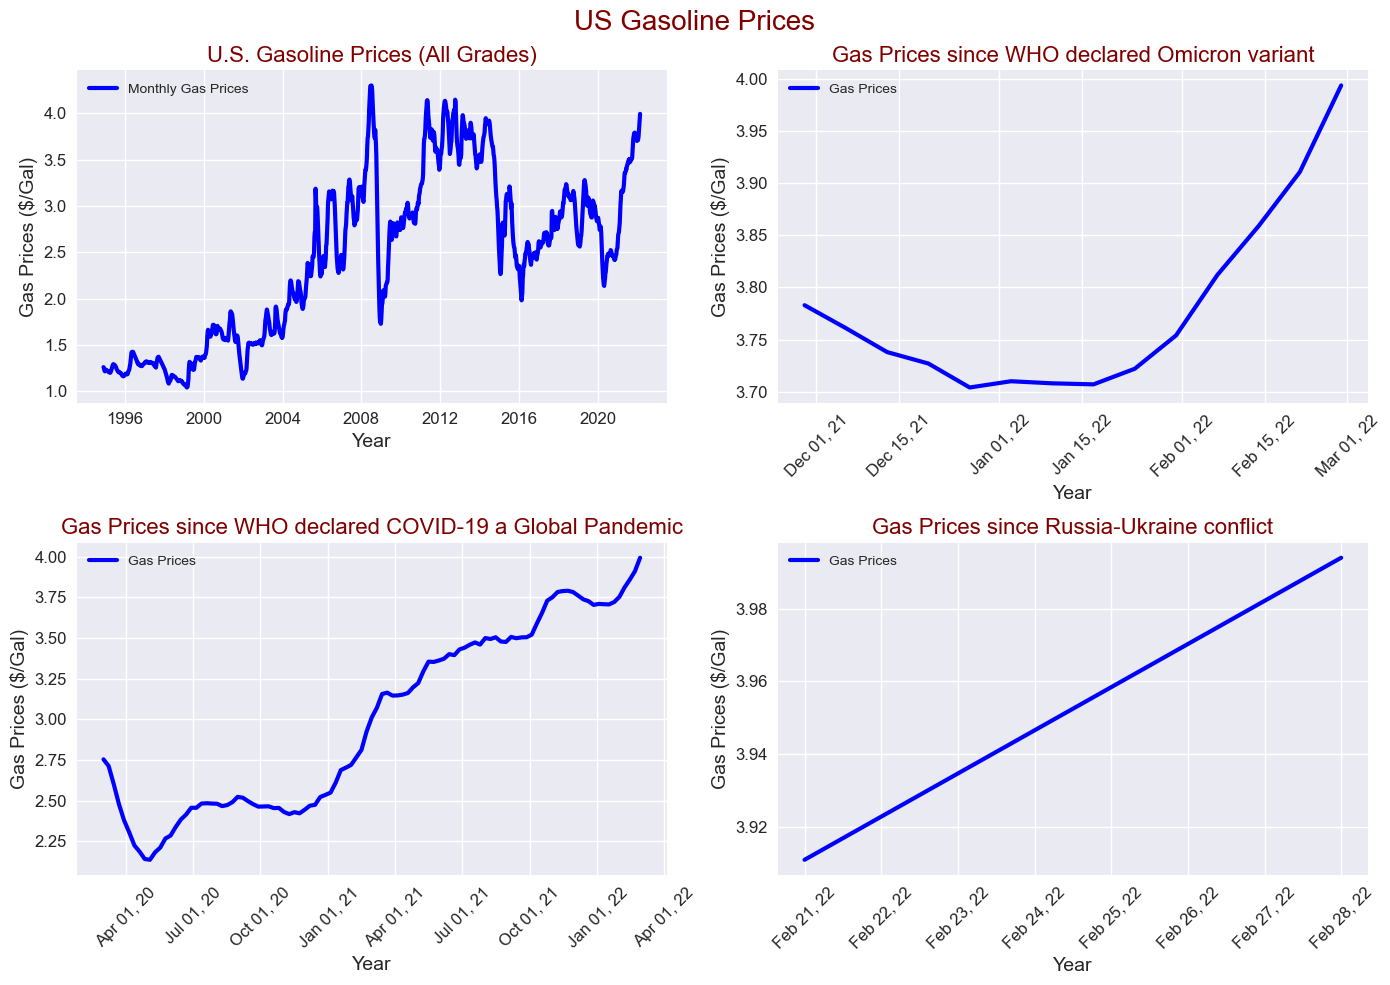

In [226]:
# starting with a plot of the U.S. monthly gas prices from 1994 to end of February 2022
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(221)
ax.plot(df['US_Overall'], label='Monthly Gas Prices', color='b', lw=3)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Gas Prices ($/Gal)', size=14)
ax.set_title('U.S. Gasoline Prices (All Grades)', fontsize=16, color='maroon')
ax.legend(loc='upper left')
plt.xticks(size=12), plt.yticks(size=12)
plt.tight_layout()

# subplot to focus on gas prices since WHO declared Omicron as variant of concern
ax2 = fig.add_subplot(222)
ax2.plot(df['US_Overall']['2021-11-29' :'2022-02-28'], label='Gas Prices', color='b', lw=3)
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('Gas Prices ($/Gal)', size=14)
ax2.set_title('Gas Prices since WHO declared Omicron variant', fontsize=16, color='maroon')
ax2.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d, %y'))
plt.xticks(rotation=45, size=12)  
ax2.legend()
plt.yticks(size=12)
plt.tight_layout()

# subplot to focus on gas prices since WHO declared COVID-19 as global pandemic (March 3, 2020)
ax3 = fig.add_subplot(223)
ax3.plot(df['US_Overall']['2020-03-02' :'2022-02-28'], label='Gas Prices', color='b', lw=3)
ax3.set_xlabel('Year', size=14)
ax3.set_ylabel('Gas Prices ($/Gal)', size=14)
ax3.set_title('Gas Prices since WHO declared COVID-19 a Global Pandemic', fontsize=16, color='maroon')
ax3.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d, %y'))
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
ax3.legend()
plt.tight_layout()

# subplot to focus on gas prices since Russia-Ukraine conflict (February 24, 2022) (data only avail on Feb 21 and Feb 28)
ax4 = fig.add_subplot(224)
ax4.plot(df['US_Overall']['2022-02-21' :'2022-02-28'], label='Gas Prices', color='b', lw=3)
ax4.set_xlabel('Year', fontsize=14)
ax4.set_ylabel('Gas Prices ($/Gal)', size=14)
ax4.set_title('Gas Prices since Russia-Ukraine conflict', fontsize=16, color='maroon')
ax4.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d, %y'))
plt.xticks(rotation=45, size=12)  
ax4.legend()
plt.yticks(size=12)
plt.suptitle('US Gasoline Prices', color='maroon', size=20)
plt.tight_layout()

### 2024 Plot (New as of 12/27/2024)

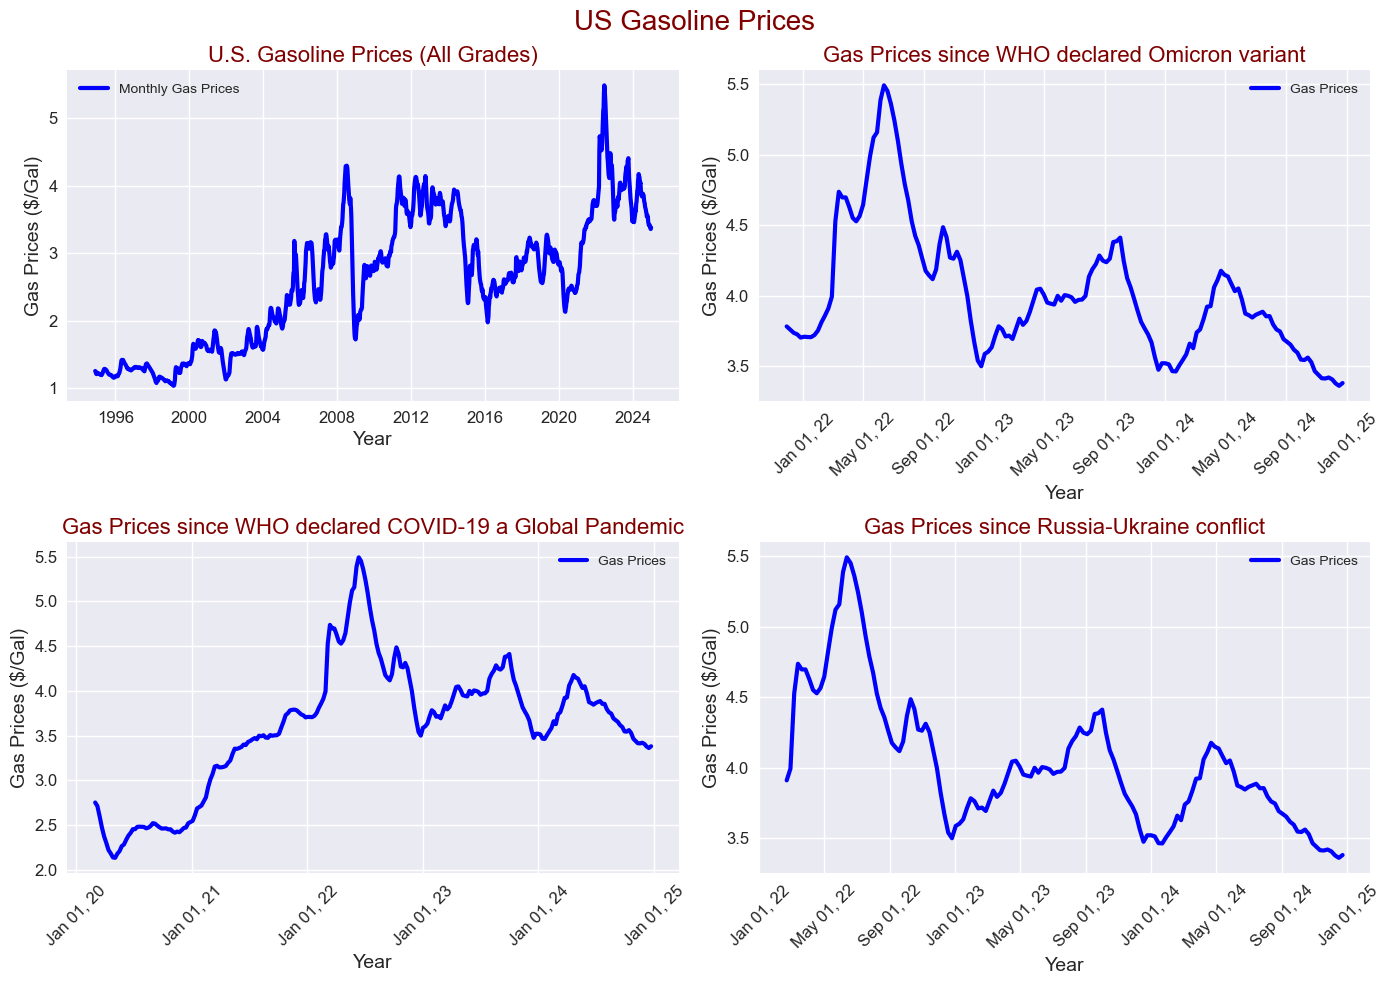

In [228]:
# starting with a plot of the U.S. monthly gas prices from 1994 to end of February 2022
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(221)
ax.plot(dfNEW['US_Overall'], label='Monthly Gas Prices', color='b', lw=3)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Gas Prices ($/Gal)', size=14)
ax.set_title('U.S. Gasoline Prices (All Grades)', fontsize=16, color='maroon')
ax.legend(loc='upper left')
plt.xticks(size=12), plt.yticks(size=12)
plt.tight_layout()

# subplot to focus on gas prices since WHO declared Omicron as variant of concern
ax2 = fig.add_subplot(222)
ax2.plot(dfNEW['US_Overall']['2021-11-29' :'2024-12-23'], label='Gas Prices', color='b', lw=3)
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('Gas Prices ($/Gal)', size=14)
ax2.set_title('Gas Prices since WHO declared Omicron variant', fontsize=16, color='maroon')
ax2.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d, %y'))
plt.xticks(rotation=45, size=12)  
ax2.legend()
plt.yticks(size=12)
plt.tight_layout()

# subplot to focus on gas prices since WHO declared COVID-19 as global pandemic (March 3, 2020)
ax3 = fig.add_subplot(223)
ax3.plot(dfNEW['US_Overall']['2020-03-02' :'2024-12-23'], label='Gas Prices', color='b', lw=3)
ax3.set_xlabel('Year', size=14)
ax3.set_ylabel('Gas Prices ($/Gal)', size=14)
ax3.set_title('Gas Prices since WHO declared COVID-19 a Global Pandemic', fontsize=16, color='maroon')
ax3.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d, %y'))
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
ax3.legend()
plt.tight_layout()

# subplot to focus on gas prices since Russia-Ukraine conflict (February 24, 2022) (data only avail on Feb 21 and Feb 28)
ax4 = fig.add_subplot(224)
ax4.plot(dfNEW['US_Overall']['2022-02-21' :'2024-12-23'], label='Gas Prices', color='b', lw=3)
ax4.set_xlabel('Year', fontsize=14)
ax4.set_ylabel('Gas Prices ($/Gal)', size=14)
ax4.set_title('Gas Prices since Russia-Ukraine conflict', fontsize=16, color='maroon')
ax4.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d, %y'))
plt.xticks(rotation=45, size=12)  
ax4.legend()
plt.yticks(size=12)
plt.suptitle('US Gasoline Prices', color='maroon', size=20)
plt.tight_layout()

## Define a function to return a specific region's gas prices/year

Next, I want to define a function `annual_gas_price_average(region)` that takes in the argument 'region' (set of 18 regions) and returns that region's annual gas price per year.</span>

In [229]:
# first function 
def annual_gas_price_average(region):
    """Takes a region and returns yearly
    
    Parameters
    ----------
    region : string
        
    Returns
    -------
    pandas series of average gasoline prices by year from 1994 to 2022 
    
    """
    
    df_years = df.groupby(by=df.index.year)   # using groupby to group each year and apply mean() function
    df_yearly_avg = df_years.mean()
    
    for i, r in df.iterrows():                # iterate over df rows  
        if region == 'US_Overall':
            return df_yearly_avg.US_Overall
        elif region == 'East_Coast':
            return df_yearly_avg.East_Coast
        elif region == 'New_England':
            return df_yearly_avg.New_England
        elif region == 'Central_Atlantic':
            return df_yearly_avg.Central_Atlantic
        elif region == 'Lower_Atlantic':
            return df_yearly_avg.Lower_Atlantic 
        elif region == 'Midwest':
            return df_yearly_avg.Midwest
        elif region == 'Gulf_Coast':
            return df_yearly_avg.Gulf_Coast
        elif region == 'West_Coast':
            return df_yearly_avg.West_Coast
        elif region == 'California':
            return df_yearly_avg.California
        elif region == 'Massachusetts':
            return df_yearly_avg.Massachusetts
        elif region == 'Texas':
            return df_yearly_avg.Texas
        elif region == 'New_York':
            return df_yearly_avg.New_York
        elif region == 'Boston':
            return df_yearly_avg.Boston
        elif region == 'Chicago':
            return df_yearly_avg.Chicago
        elif region == 'Houston':
            return df_yearly_avg.Houston
        elif region == 'Los_Angeles':
            return df_yearly_avg.Los_Angeles
        elif region == 'New_York_Harbor':
            return df_yearly_avg.New_York_Harbor
        elif region == 'San_Fran':
            return df_yearly_avg.San_Fran
    else: 
        print('invalid_region')

In [240]:
# New Data
def NEW_annual_gas_price_average(region):
    """Takes a region and returns yearly
    
    Parameters
    ----------
    region : string
        
    Returns
    -------
    pandas series of average gasoline prices by year from 1994 to 2022 
    
    """
    
    dfNEW_years = dfNEW.groupby(by=dfNEW.index.year)   # using groupby to group each year and apply mean() function
    dfNEW_yearly_avg = dfNEW_years.mean()
    
    for i, r in dfNEW.iterrows():                # iterate over df rows  
        if region == 'US_Overall':
            return dfNEW_yearly_avg.US_Overall
        elif region == 'East_Coast':
            return dfNEW_yearly_avg.East_Coast
        elif region == 'New_England':
            return dfNEW_yearly_avg.New_England
        elif region == 'Central_Atlantic':
            return dfNEW_yearly_avg.Central_Atlantic
        elif region == 'Lower_Atlantic':
            return dfNEW_yearly_avg.Lower_Atlantic 
        elif region == 'Midwest':
            return dfNEW_yearly_avg.Midwest
        elif region == 'Gulf_Coast':
            return dfNEW_yearly_avg.Gulf_Coast
        elif region == 'West_Coast':
            return dfNEW_yearly_avg.West_Coast
        elif region == 'California':
            return dfNEW_yearly_avg.California
        elif region == 'Massachusetts':
            return dfNEW_yearly_avg.Massachusetts
        elif region == 'Texas':
            return dfNEW_yearly_avg.Texas
        elif region == 'New_York':
            return dfNEW_yearly_avg.New_York
        elif region == 'Boston':
            return dfNEW_yearly_avg.Boston
        elif region == 'Chicago':
            return dfNEW_yearly_avg.Chicago
        elif region == 'Houston':
            return dfNEW_yearly_avg.Houston
        elif region == 'Los_Angeles':
            return dfNEW_yearly_avg.Los_Angeles
        elif region == 'New_York_Harbor':
            return dfNEW_yearly_avg.New_York_Harbor
        elif region == 'San_Fran':
            return dfNEW_yearly_avg.San_Fran
    else: 
        print('invalid_region')

## Comparing Texas and California

For my next plot I want to analyze trends in gas prices by using my function above to plot and compare averages in price from Texas, California, and the U.S. as a whole.

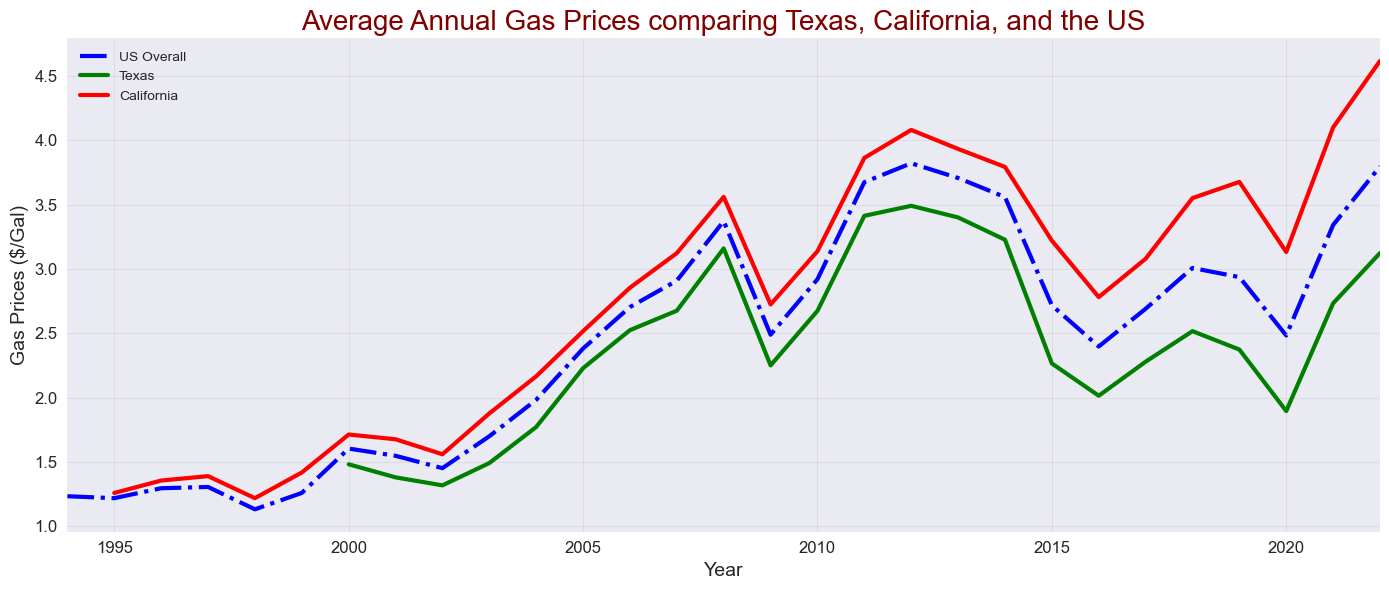

In [241]:
# plot using my function
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)
ax.plot(annual_gas_price_average('US_Overall'), label='US Overall', lw=3, color='b', ls='dashdot')
ax.plot(annual_gas_price_average('Texas'), label='Texas', lw=3, color='g')
ax.plot(annual_gas_price_average('California'), label='California', lw=3, color='r', linestyle='-')
ax.set_title('Average Annual Gas Prices comparing Texas, California, and the US', color='maroon', size=20)
ax.set_xlabel('Year', size=14)
ax.set_ylabel('Gas Prices ($/Gal)', size=14)
ax.grid(color='gray', alpha=0.2, lw=.5, axis='both')
ax.set_xlim(1994, 2022)
plt.xticks(size=12), plt.yticks(size=12)
ax.legend()
plt.tight_layout()

## NEW DATA for Comparison

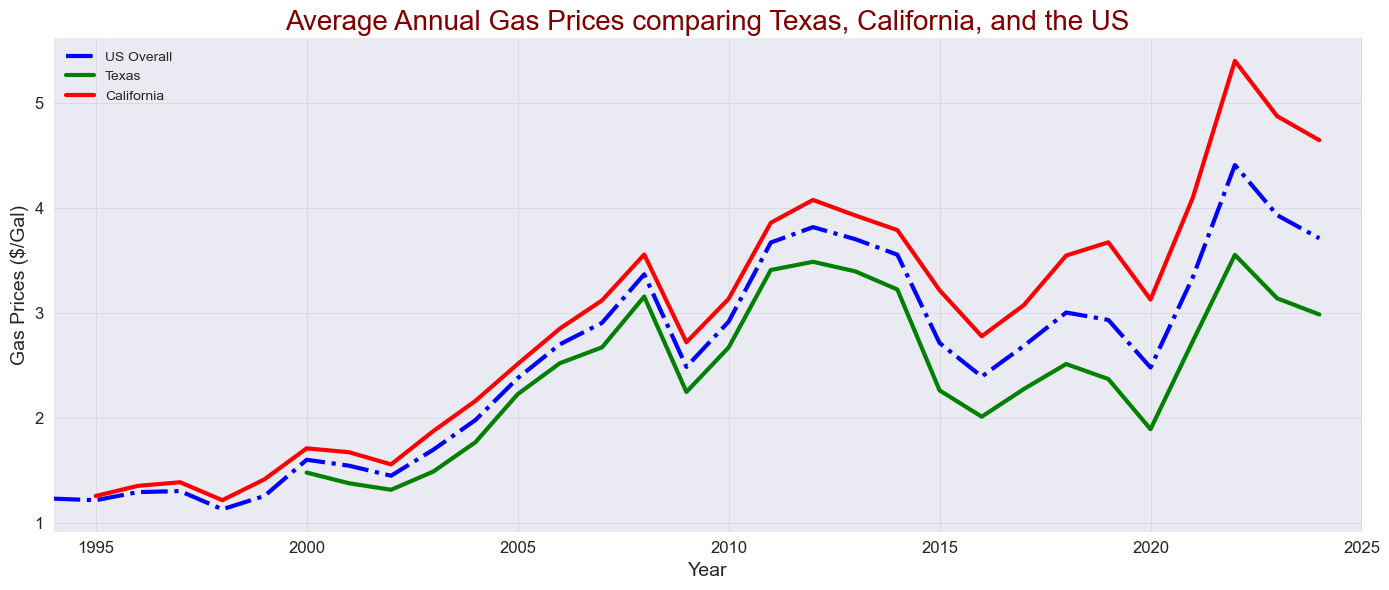

In [242]:
# plot using my function
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)
ax.plot(NEW_annual_gas_price_average('US_Overall'), label='US Overall', lw=3, color='b', ls='dashdot')
ax.plot(NEW_annual_gas_price_average('Texas'), label='Texas', lw=3, color='g')
ax.plot(NEW_annual_gas_price_average('California'), label='California', lw=3, color='r', linestyle='-')
ax.set_title('Average Annual Gas Prices comparing Texas, California, and the US', color='maroon', size=20)
ax.set_xlabel('Year', size=14)
ax.set_ylabel('Gas Prices ($/Gal)', size=14)
ax.grid(color='gray', alpha=0.2, lw=.5, axis='both')
ax.set_xlim(1994, 2025)
plt.xticks(size=12), plt.yticks(size=12)
ax.legend()
plt.tight_layout()

## Analysis - Texas Highs

Next I would like to zone in on Texas and figure out, historically, what months have the highest gas prices.

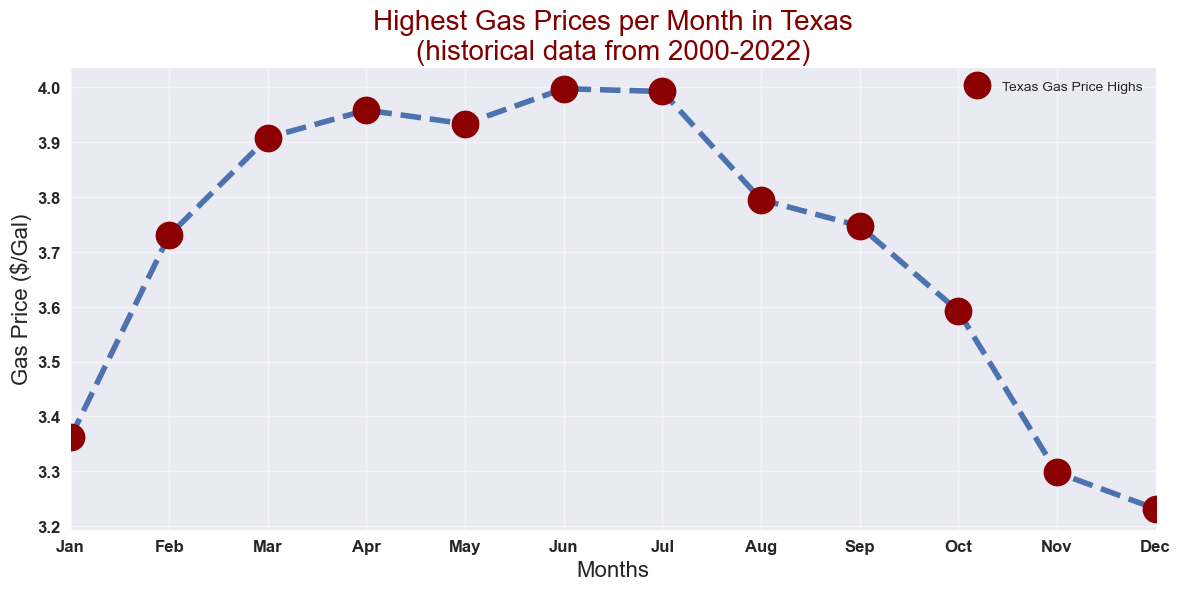

In [243]:
# use groupby to index the months, then use max() to get the highest values, and then slice values for Texas 
df_months = df.groupby(by=df.index.month)
df_monthly_highs = df_months.max()
texas_monthly_highs = df_monthly_highs['Texas']

# Now plot the highest prices for each month 
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)
ax.plot(texas_monthly_highs, lw=4, ls='--', label='Texas Gas Price Highs', marker='o', ms=20, mfc='darkred', mec='r')  # mec not showing up
ax.set_xlabel('Months', size=16)
ax.set_ylabel('Gas Price ($/Gal)', size=16)
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_title('Highest Gas Prices per Month in Texas\n(historical data from 2000-2022)', size=20, color='maroon')
ax.set_xlim(1, 12)
xticklabels = ['Jan','Feb','Mar','Apr','May','Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(xticklabels, size=12, weight='bold')
plt.yticks(size=12, weight='bold')
ax.grid(alpha=.5)
ax.legend()
plt.show()

## NEW DATA Texas Highs

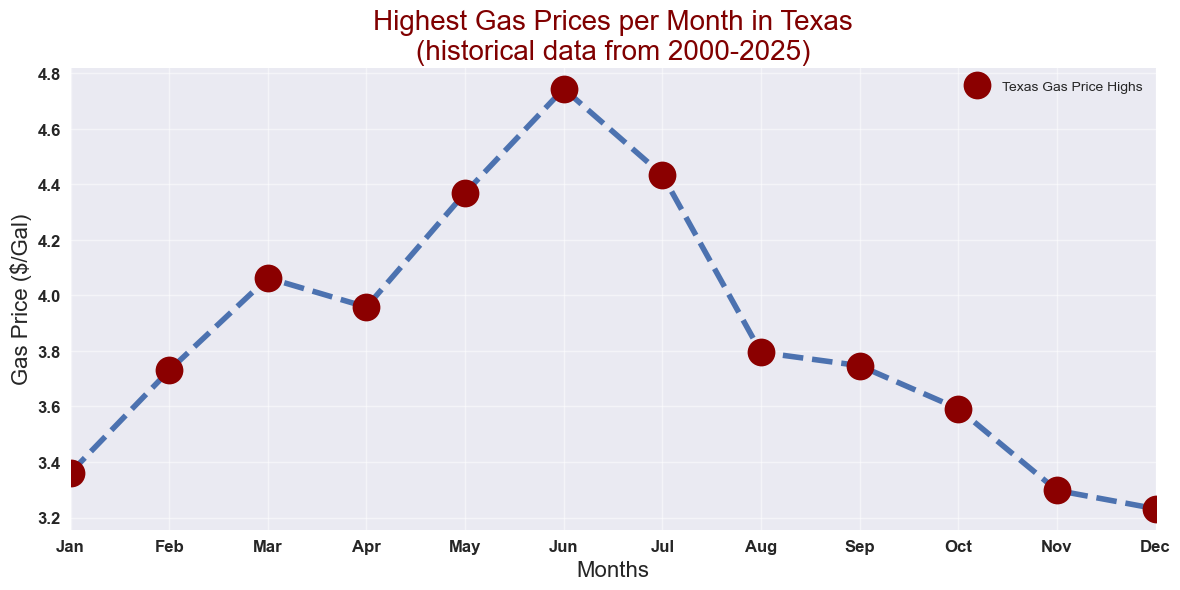

In [244]:
# use groupby to index the months, then use max() to get the highest values, and then slice values for Texas 
dfNEW_months = dfNEW.groupby(by=dfNEW.index.month)
dfNEW_monthly_highs = dfNEW_months.max()
NEW_texas_monthly_highs = dfNEW_monthly_highs['Texas']

# Now plot the highest prices for each month 
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)
ax.plot(NEW_texas_monthly_highs, lw=4, ls='--', label='Texas Gas Price Highs', marker='o', ms=20, mfc='darkred', mec='r')  # mec not showing up
ax.set_xlabel('Months', size=16)
ax.set_ylabel('Gas Price ($/Gal)', size=16)
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_title('Highest Gas Prices per Month in Texas\n(historical data from 2000-2025)', size=20, color='maroon')
ax.set_xlim(1, 12)
xticklabels = ['Jan','Feb','Mar','Apr','May','Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(xticklabels, size=12, weight='bold')
plt.yticks(size=12, weight='bold')
ax.grid(alpha=.5)
ax.legend()
plt.show()

I want to add a column to my dataframe and use groupby in a different way to plot the highest gas prices in Texas based on the day of the week
* **Spoiler Alert!:** Every single datapoint is on a Monday! (after pondering over why I kept getting all 0's for my `df.index.dayofweek`)</span>


## Load European Petrol Prices

I now want to read in another csv that contains data on gas prices in Europe.

I obtained my data from the European Environment Agency at https://www.eea.europa.eu/data-and-maps/daviz/nominal-and-real-fuel-prices-6/#tab-chart_1

In [245]:
df2 = pd.read_csv('..\\data\\european_gas_prices.csv', parse_dates=[0], na_values='NaN', index_col=[0])
df2 = df2.drop('year:year', axis=1)  # drop irrelevant column 'year:year'
#df2

# NEW DATA
df2NEW = pd.read_csv('..\\data\\new-european-gas-prices.csv', parse_dates=[0], na_values='NaN', index_col=[0])
df2NEW = df2NEW.drop('year:year', axis=1)  # drop irrelevant column 'year:year'
df2NEW

,Diesel (nominal):number,"All petrol, unleaded equivalent (nominal):number","All fuel, unleaded petrol equivalent (nominal):number","All fuel, unleaded petrol equivalent (real*):number","Average, all fuel, unleaded petrol equivalent (real*, weighted by consumption):number","All fuel, unleaded petrol equivalent (real*, excl. tax):text","Average, all fuel, unleaded petrol equivalent (real*, weighted by consumption, excl. tax):number","Diesel (nominal, excl. tax):text","All fuel, unleaded petrol equivalent (nominal, excl. tax):text","All petrol, unleaded equivalent (nominal, excl. tax):text"
Date:date,,,,,,,,,,
1980-01-15,0.364,0.482,0.392,0.986,1.163,NaN,0.459,NaN,NaN,NaN
1980-04-15,0.390,0.518,0.420,1.047,1.163,NaN,0.459,NaN,NaN,NaN
1980-07-15,0.400,0.535,0.433,1.077,1.163,NaN,0.459,NaN,NaN,NaN
1980-10-15,0.401,0.525,0.428,1.052,1.163,NaN,0.459,NaN,NaN,NaN
1981-01-15,0.414,0.562,0.453,1.023,1.163,NaN,0.459,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-08-06,1.352,1.466,1.282,1.228,1.163,NaN,0.459,NaN,NaN,NaN
2018-08-13,1.352,1.465,1.282,1.228,1.163,NaN,0.459,NaN,NaN,NaN
2018-08-20,1.355,1.465,1.284,1.230,1.163,NaN,0.459,NaN,NaN,NaN


## Defining a function to convert Euros to Dollars

Notice that prices are given in **EUR** and not **USD**, so I will define a function to convert all values.

---

Because of this, I want to create some functions to convert EUR to USD (`euros_to_dollars`) and also convert euros per liter to dollars per gallon (`epl_to_dpg`)


In [246]:
def euros_to_dollars(euros):
    """Takes a Euro amount and converts to US dollars
    
    Parameters
    ----------
    euros : float
        
    Returns
    -------
    conversion from euros to dollars  
    
    Current Conversion Rate: 1 Euro == 1.09 US Dollars
    """
    
    convert_to_dollars = float(euros) * 1.09
    return convert_to_dollars

## 2022 Conversion Rate Formula

---
<span style='color:maroon'>The conversion formula from euros per liter to dollars per gallon is given by the following equation:</span>

$$
DPG = EPL \frac{3.7854 Liters}{1.0 US  Gal}  \frac{1.0  USD}{0.921  EUR} 
$$
---
<span style='color:maroon'>source=https://www.vcalc.com/wiki/pro/US+Dollar+per+Gallon+from+Euro+per+Liter

## NEW Conversion Rate Formula (As of Sep 24, 2024)

---
<span style='color:maroon'>The conversion formula from euros per liter to dollars per gallon is given by the following equation:</span>

$$
DPG = EPL \frac{3.7854 Liters}{1.0 US  Gal}  \frac{1.0  USD}{0.959  EUR} 
$$
---
<span style='color:maroon'>source=https://www.vcalc.com/wiki/pro/US+Dollar+per+Gallon+from+Euro+per+Liter

## Define a function to convert Euros/Liter to Dollars/Gallon

In [182]:
def epl_to_dpg(liter):
    """converts euros per liter to dollars per gallon
    
    Parameters
    ----------
    liter : float
        
    Returns
    -------
    conversion from liters to gallons and euros to dollars  
    
    Current Conversion Rate: 1 USD == 0.92 EUR, 1 US Gallon == 3.7854 Liters
    """
    
    convert_to_gallons = float(liter) *  3.785 / 0.92  # multiply liters/gal 3.785 liters to a gal and divide by 0.92 euros to dollars
    return convert_to_gallons

In [248]:
def NEW_epl_to_dpg(liter):
    """converts euros per liter to dollars per gallon
    
    Parameters
    ----------
    liter : float
        
    Returns
    -------
    conversion from liters to gallons and euros to dollars  
    
    Current Conversion Rate: 1 USD == 0.92 EUR, 1 US Gallon == 3.7854 Liters
    """
    
    convert_to_gallons = float(liter) *  3.785 / 0.96  # multiply liters/gal 3.785 liters to a gal and divide by 0.96 euros to dollars
    return convert_to_gallons

<span style='color:maroon'>Now to use my `epl_to_dpg` function as an argument of  the `applymap()` function and create another dataframe called `df_dollars`.

In [254]:
# apply conversion to values in df2
df_dollars = df2.applymap(epl_to_dpg) 
#df_dollars 

# apply conversion to df2NEW
NEW_df_dollars = df2NEW.applymap(NEW_epl_to_dpg)
NEW_df_dollars

,Diesel (nominal):number,"All petrol, unleaded equivalent (nominal):number","All fuel, unleaded petrol equivalent (nominal):number","All fuel, unleaded petrol equivalent (real*):number","Average, all fuel, unleaded petrol equivalent (real*, weighted by consumption):number","All fuel, unleaded petrol equivalent (real*, excl. tax):text","Average, all fuel, unleaded petrol equivalent (real*, weighted by consumption, excl. tax):number","Diesel (nominal, excl. tax):text","All fuel, unleaded petrol equivalent (nominal, excl. tax):text","All petrol, unleaded equivalent (nominal, excl. tax):text"
Date:date,,,,,,,,,,
1980-01-15,1.435146,1.900385,1.545542,3.887510,4.58537,NaN,1.809703,NaN,NaN,NaN
1980-04-15,1.537656,2.042323,1.655937,4.128016,4.58537,NaN,1.809703,NaN,NaN,NaN
1980-07-15,1.577083,2.109349,1.707193,4.246297,4.58537,NaN,1.809703,NaN,NaN,NaN
1980-10-15,1.581026,2.069922,1.687479,4.147729,4.58537,NaN,1.809703,NaN,NaN,NaN
1981-01-15,1.632281,2.215802,1.786047,4.033391,4.58537,NaN,1.809703,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-08-06,5.330542,5.780010,5.054552,4.841646,4.58537,NaN,1.809703,NaN,NaN,NaN
2018-08-13,5.330542,5.776068,5.054552,4.841646,4.58537,NaN,1.809703,NaN,NaN,NaN
2018-08-20,5.342370,5.776068,5.062437,4.849531,4.58537,NaN,1.809703,NaN,NaN,NaN


## Visualize the European gas prices (displayed in dollars per gallon) for better understanding.

### 2022 Plot

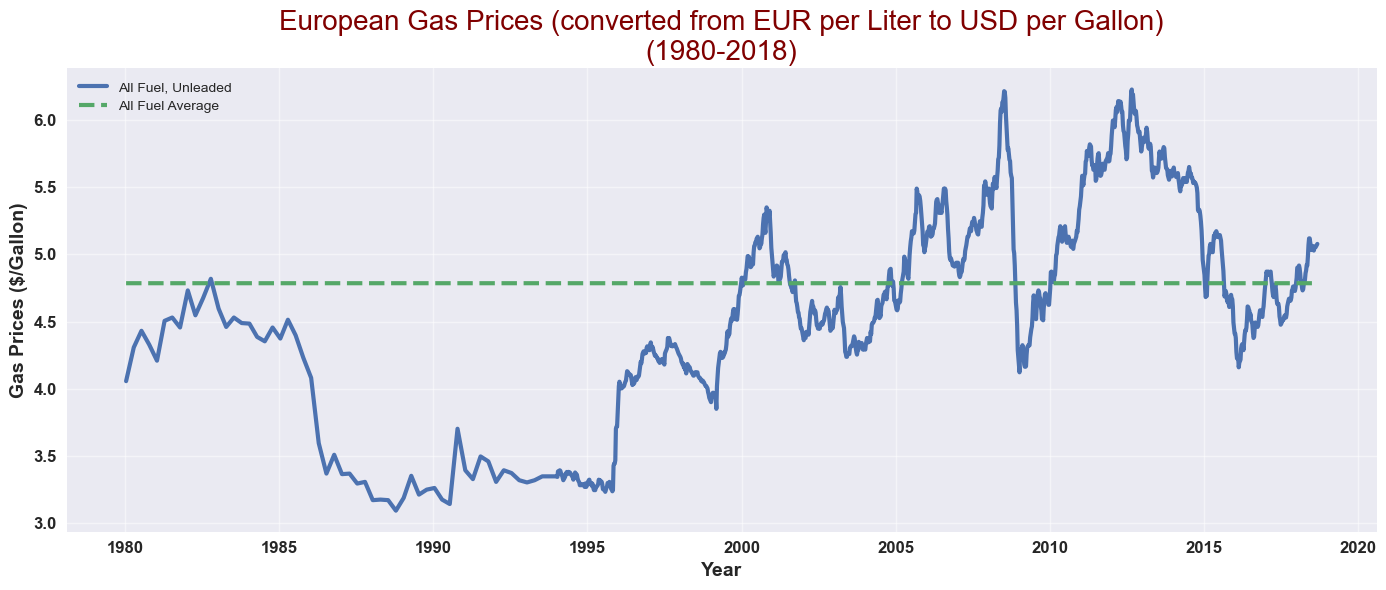

In [257]:
# add a plot to show average gas price per month in Europe from 1980 to 2018 and the horizontal average 
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)
ax.plot(df_dollars['All fuel, unleaded petrol equivalent (real*):number'], label='All Fuel, Unleaded', lw=3)
ax.plot(df_dollars['Average, all fuel, unleaded petrol equivalent (real*, weighted by consumption):number'], label='All Fuel Average', ls = '--', lw=3)
ax.legend(loc='upper left')
ax.set_title('European Gas Prices (converted from EUR per Liter to USD per Gallon)\n(1980-2018)', color='maroon', size=20)
ax.set_ylabel('Gas Prices ($/Gallon)', size=14, weight='bold')
ax.set_xlabel('Year', size=14, weight='bold')
plt.xticks(size=12, weight='bold'), plt.yticks(size=12, weight='bold')
ax.grid(alpha=.5)
plt.tight_layout()

## 2024 Plot

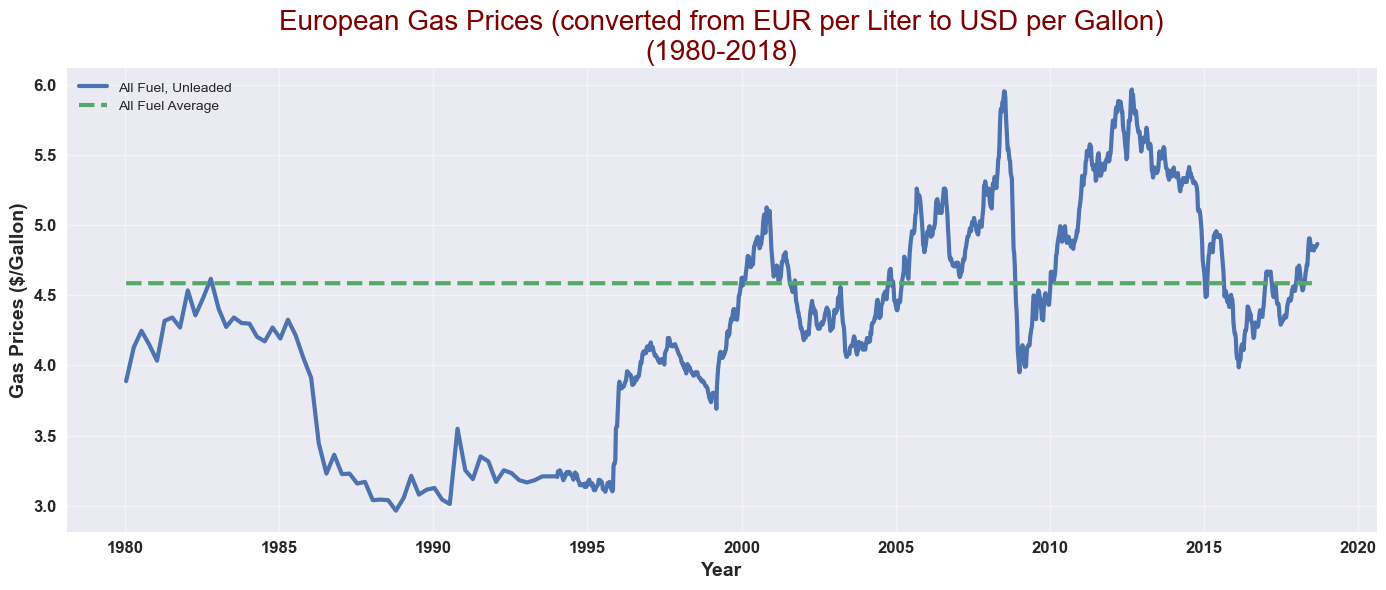

In [258]:
# add a plot to show average gas price per month in Europe from 1980 to 2018 and the horizontal average 
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)
ax.plot(NEW_df_dollars['All fuel, unleaded petrol equivalent (real*):number'], label='All Fuel, Unleaded', lw=3)
ax.plot(NEW_df_dollars['Average, all fuel, unleaded petrol equivalent (real*, weighted by consumption):number'], label='All Fuel Average', ls = '--', lw=3)
ax.legend(loc='upper left')
ax.set_title('European Gas Prices (converted from EUR per Liter to USD per Gallon)\n(1980-2018)', color='maroon', size=20)
ax.set_ylabel('Gas Prices ($/Gallon)', size=14, weight='bold')
ax.set_xlabel('Year', size=14, weight='bold')
plt.xticks(size=12, weight='bold'), plt.yticks(size=12, weight='bold')
ax.grid(alpha=.5)
plt.tight_layout()

My final analysis will be to compare the average price of gasoline in Europe to the price in the U.S.

## Final Comparison - Europe vs. USA

### 2022 Plot

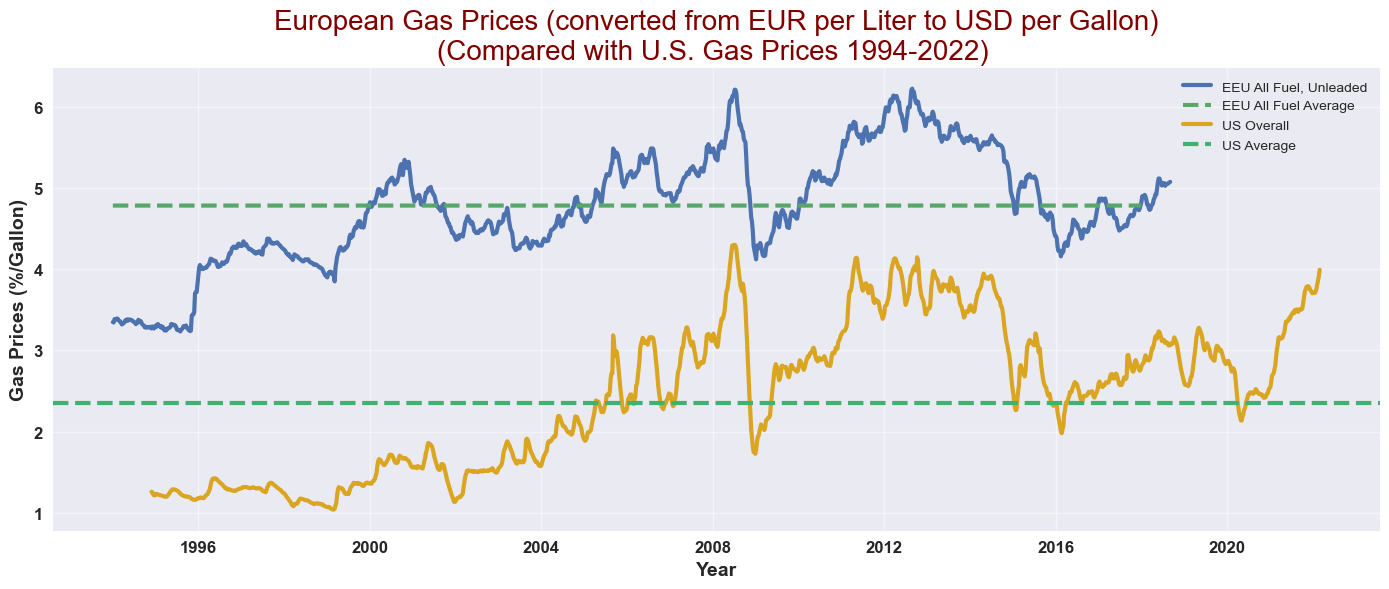

In [259]:
# compare with data from US (slice dates from 1994 to 2022 for better plot)
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)
ax.plot(df_dollars['All fuel, unleaded petrol equivalent (real*):number']['1994-01-01':'2018-09-03'], label='EEU All Fuel, Unleaded', lw=3)
ax.plot(df_dollars['Average, all fuel, unleaded petrol equivalent (real*, weighted by consumption):number']['1994-01-01':'2018-01-01'], label='EEU All Fuel Average', ls = '--', lw=3)
ax.legend(loc='upper left')
ax.set_title('European Gas Prices (converted from EUR per Liter to USD per Gallon)\n(Compared with U.S. Gas Prices 1994-2022) ', color='maroon', size=20)
ax.set_ylabel('Gas Prices (%/Gallon)', size=14, weight='bold')
ax.set_xlabel('Year', size=14, weight='bold')
plt.xticks(size=12, weight='bold'), plt.yticks(size=12, weight='bold')
ax.grid(alpha=.5)
plt.tight_layout()

# plot the US data 
us_overall = df['US_Overall']
ax.plot(us_overall, label='US Overall', lw=3, color='goldenrod', ls='-')
plt.axhline(np.mean(us_overall['1994-11-28' :'2018-09-03']), color='mediumseagreen', ls='--', lw=3, label='US Average')
ax.legend()
plt.tight_layout()

## 2024 Plot

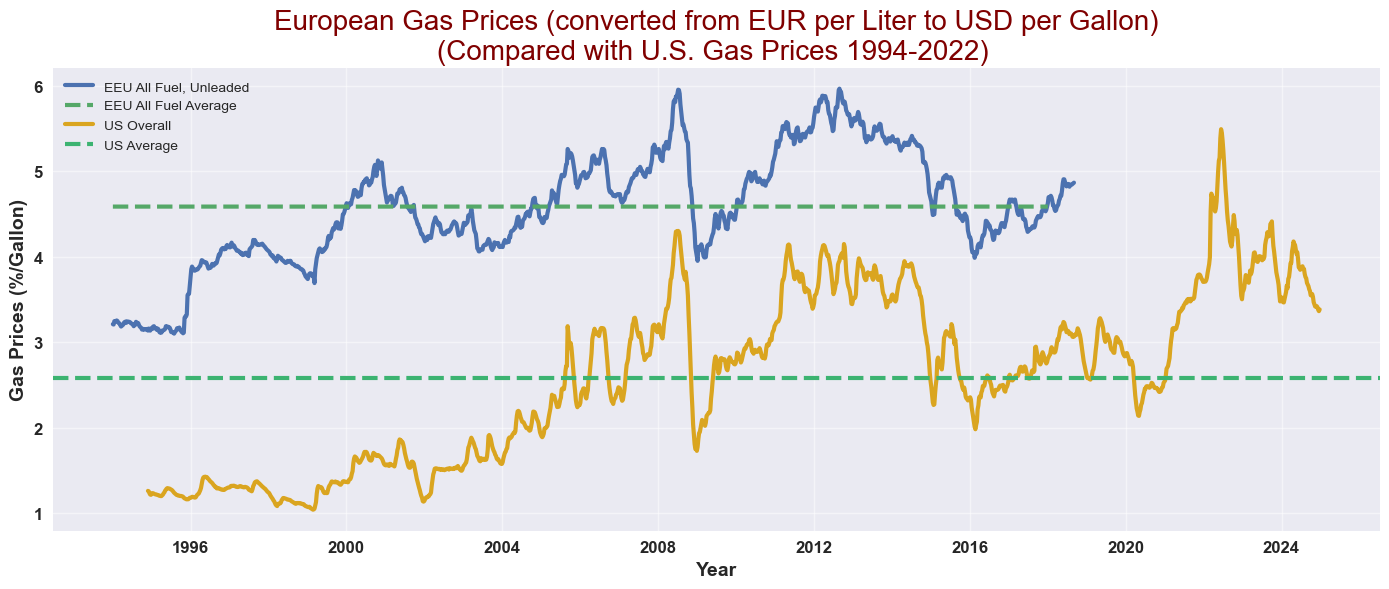

In [260]:
# compare with data from US (slice dates from 1994 to 2022 for better plot)
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)
ax.plot(NEW_df_dollars['All fuel, unleaded petrol equivalent (real*):number']['1994-01-01':'2018-09-03'], label='EEU All Fuel, Unleaded', lw=3)
ax.plot(NEW_df_dollars['Average, all fuel, unleaded petrol equivalent (real*, weighted by consumption):number']['1994-01-01':'2018-01-01'], label='EEU All Fuel Average', ls = '--', lw=3)
ax.legend(loc='upper left')
ax.set_title('European Gas Prices (converted from EUR per Liter to USD per Gallon)\n(Compared with U.S. Gas Prices 1994-2022) ', color='maroon', size=20)
ax.set_ylabel('Gas Prices (%/Gallon)', size=14, weight='bold')
ax.set_xlabel('Year', size=14, weight='bold')
plt.xticks(size=12, weight='bold'), plt.yticks(size=12, weight='bold')
ax.grid(alpha=.5)
plt.tight_layout()

# plot the US data 
NEW_us_overall = dfNEW['US_Overall']
ax.plot(NEW_us_overall, label='US Overall', lw=3, color='goldenrod', ls='-')
plt.axhline(np.mean(NEW_us_overall['1994-11-28' :'2024-12-23']), color='mediumseagreen', ls='--', lw=3, label='US Average')
ax.legend()
plt.tight_layout()

In [261]:
# check earliest and latest available data in dataset
print(df_dollars.index.min())  # earliest date
print(df_dollars.index.max())  # latest date
print(us_overall.tail())
print(us_overall['1994-11-28' :'2022-02-28'])

1980-01-15 00:00:00
2018-09-03 00:00:00
Date
2022-02-07    3.812
2022-02-14    3.859
2022-02-21    3.911
2022-02-28    3.994
NaT             NaN
Name: US_Overall, dtype: float64
Date
1994-11-28    1.259
1994-12-05    1.254
1994-12-12    1.231
1994-12-19    1.216
1994-12-26    1.213
              ...  
2022-01-31    3.754
2022-02-07    3.812
2022-02-14    3.859
2022-02-21    3.911
2022-02-28    3.994
Name: US_Overall, Length: 1423, dtype: float64


---

This analysis confirmed what I thought about European gas prices being higher than the U.S., but not to this extent. It looks drammatic and apparent when plotted and visualized! The major changes resemble each other, however, the European prices are always higher. Further analysis makes me think it is due to both the availability of petroleum and/or the amount of taxes required by respective governments. Also, The European data hasn't released new petrol prices since 2018, so the graphs are quite similiar for Europe. Of course, there is plenty more research ideas to stem from this project, but the one I'm most curious about and might pursue in the near future is applying these same techniques to analyze the real estate and housing market in the US, and possibly compare that the Europe. 

--- 